In [11]:
import sys, os
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import shapely
import rioxarray as rxr
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
sys.path.append(os.path.join(os.getcwd(), '..', '..'))
from gnt.data.common.geobox.geobox import get_or_create_geobox
from odc.geo import CRS
from odc.geo.xr import ODCExtensionDa, assign_crs, xr_reproject
crs = "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs"

def round_coords(ds):
    ds_cp = ds.copy()
    for coord_name in ds_cp.sizes.keys():
        if coord_name in ["latitude", "longitude", "y", "x"]:
            ds_cp.coords[coord_name] = ds_cp.coords[coord_name].values.round(5)
    return ds_cp

In [10]:
modis = xr.open_zarr("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/glass/LST/MODIS/Daily/1KM/processed/stage_2/modis_timeseries_reprojected.zarr", consolidated = False)
modis = modis.rio.write_crs(4326)

In [30]:
avhrr = xr.open_zarr("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/glass/LST/AVHRR/0.05D/processed/stage_2/avhrr_timeseries_reprojected.zarr", consolidated = False)
avhrr = avhrr.rio.write_crs(4326)

In [5]:
# dmsp = xr.open_zarr("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/eog/dmsp/processed/stage_2/dmsp_timeseries_reprojected.zarr")
# dmsp = dmsp.rio.write_crs(4326)

In [6]:
# dvnl = xr.open_zarr("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/eog/dvnl/processed/stage_2/viirs_dvnl_timeseries_reprojected.zarr")
# dvnl = dvnla.rio.write_crs(4326)

In [24]:
import pandas as pd
test = pd.read_parquet("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/assembled/modis.parquet/ix=0/iy=0/data.parquet")

In [30]:
(test["ntl_harm"] * 0.01).max()

26.0

In [9]:
test.ntl_harm.quantile(.999)

np.float64(800.0)

In [3]:
viirs = xr.open_zarr("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/eog/viirs/processed/stage_2/viirs_annual_timeseries_reprojected.zarr")
viirs = viirs.rio.write_crs(4326)

/scratch/ipykernel_1815004/3234828534.py:1: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  viirs = xr.open_zarr("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/eog/viirs/processed/stage_2/viirs_annual_timeseries_reprojected.zarr")


In [4]:
viirs.coords["longitude"].values[:5]

array([-180.     , -179.99583, -179.99167, -179.9875 , -179.98333])

In [5]:
viirs.coords["longitude"] = viirs.coords["longitude"].values.round(5)

In [1]:
viirs.to_zarr("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/eog/viirs/processed/stage_2/viirs_annual_timeseries_reprojected.zarr",compute=False,mode="w")


KeyboardInterrupt



In [ ]:
ntl_harm = xr.open_zarr("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/ntl_harm/harmonized/processed/stage_2/ntl_harm_timeseries_reprojected.zarr", consolidated = False, decode_coords="all")
ntl_harm = ntl_harm.rio.write_crs(4326)

In [2]:
land_mask = xr.open_zarr("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/misc/processed/stage_2/osm/land_mask.zarr")
land_mask = land_mask.rio.write_crs(4326)

In [52]:
cluster = xr.open_zarr("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/misc/processed/stage_2/gadm/countries_grid.zarr", consolidated = False).subdivisions
cluster = cluster.rio.write_crs(4326)

In [13]:
from odc.geo.geom import Geometry

#cities = gpd.read_file("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/misc/raw/cities/urbanspatial-guppd-v1-gpkg.gpkg", engine = "pyogrio", layer="urbanspatial_guppd_v1_polygons")
countries = gpd.read_file("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/misc/processed/stage_1/gadm/gadm_levelADM_0_simplified.gpkg")
subset_geom = Geometry(countries.query("GID_0=='UGA'").geometry.iloc[0], crs=4326)

In [ ]:
# gba = (112.5, 22, 114, 23.5)
# lagos = (3, 6.25, 4.25, 7) # not great
# swa = (-9, 3.5, 2, 12)
# bangladesh = (88.0844222351, 20.670883287, 92.6727209818, 26.4465255803)
# hcmc = (106.3, 10.3, 107.3, 11.2)
# jakarta = (106.2, -6.7, 107.7, -6) # decent
# chengdu = (103, 30, 105, 31)
# cairo = (30.7, 29.7, 31.6, 30.3) # ok but bad pictures
# riyadh = (46.3, 23.5, 48, 25.1) # heat island visible in cross section, small and negative coef
# delhi = (76.5, 27.6, 78.5, 29)
# nairobi = (36.6, -1.5, 37.2, -0.9) # no clear pattern visible, negative coef
# kuala_lumpur = (101.3, 2.8, 102, 3.4) # decent visuals, super small and negative ceof
# toronto = (-80, 43, -79, 44) # crazy gridded look in MODIS data
# las_vegas = (-115.6, 36, -114.6, 36.4)
# austin = (-98.1, 30.1, -97.2, 30.8) # weird loss of radiance, miniscule positive coef

# subset_box = hcmc

In [ ]:
# modis_subset = modis.rio.clip_box(*subset_box)["median"].compute().rename("modis_lst").ffill("latitude", 2)
# viirs_subset = viirs.rio.clip_box(*subset_box)["viirs_annual"].compute().rename("viirs_radiance")
# # dmsp_subset = dmsp.rio.clip_box(*subset_box)["dmsp"].compute()
# # dvnl_subset = dvnl.rio.clip_box(*subset_box)["viirs_dvnl"].compute().rename("dvnl")
# land_mask_subset = land_mask.rio.clip_box(*subset_box)["land_mask"].compute()

In [102]:
modis_subset = modis.odc.crop(subset_geom)["median"].compute().rename("modis_lst").ffill("latitude", 2)
viirs_subset = viirs.odc.crop(subset_geom)["viirs_annual"].compute().rename("viirs_radiance")
land_mask_subset = land_mask.odc.crop(subset_geom)["land_mask"].compute()
cluster_subset = cluster.odc.crop(subset_geom).compute()

In [10]:
# correction_matrix = (dmsp_subset.sel(time="2013-12-31") - dvnl_subset.sel(time="2013-12-31"))
# dvnl_subset_corrected = dvnl_subset + correction_matrix
# dmsp_ext_subset = xr.concat([dmsp_subset.sel(time=slice("2000-12-31", "2012-12-31")), dvnl_subset_corrected], "time").rename("dmsp_ext")

In [103]:
merged = xr.merge([round_coords(modis_subset), round_coords(viirs_subset), round_coords(land_mask_subset), round_coords(cluster_subset)], compat='override', join='inner')
# merged = xr.merge([round_coords(modis_subset), round_coords(dmsp_ext_subset), round_coords(land_mask_subset)], compat='override', join='outer')
merged = merged.where(merged.land_mask)

In [ ]:
# cities = pd.read_csv("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/misc/raw/cities/worldcities.csv")
# cities = gpd.GeoDataFrame(cities[["city", "population"]], geometry = [shapely.Point(x, y) for x, y in zip(cities.lat, cities.lng)], crs = 4326)
# cities = cities.query("population > 1000000")

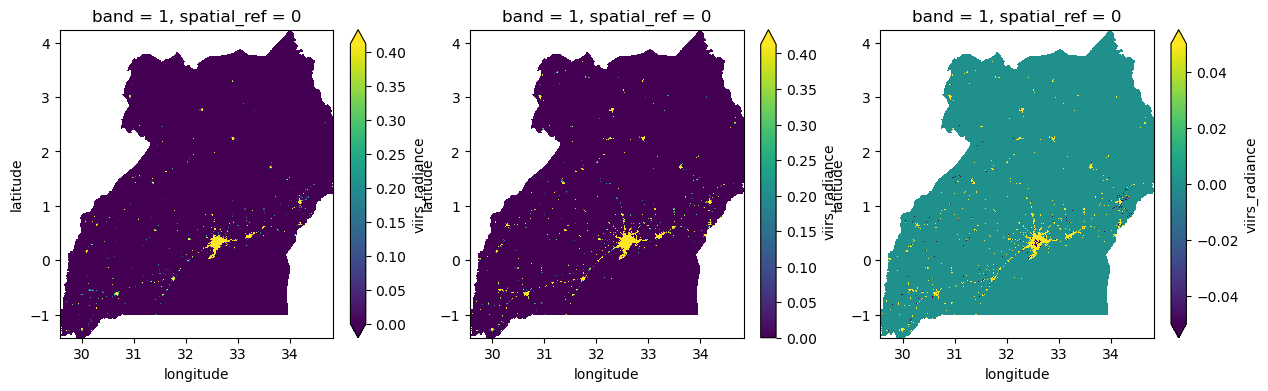

In [104]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))

qq_vmax = merged.viirs_radiance.quantile(.99)

t1 = merged.viirs_radiance.sel(time=slice("2012-12-31", "2013-12-31")).median("time"); t1.squeeze().plot.imshow(ax = ax[0], vmin = 0, vmax = qq_vmax)
t2 = merged.viirs_radiance.sel(time=slice("2018-12-31", "2019-12-31")).median("time"); t2.squeeze().plot.imshow(ax = ax[1], vmin = 0, vmax = qq_vmax)
viirs_subset_ld = (t2 - t1); viirs_subset_ld.squeeze().plot.imshow(ax = ax[2], robust=True)

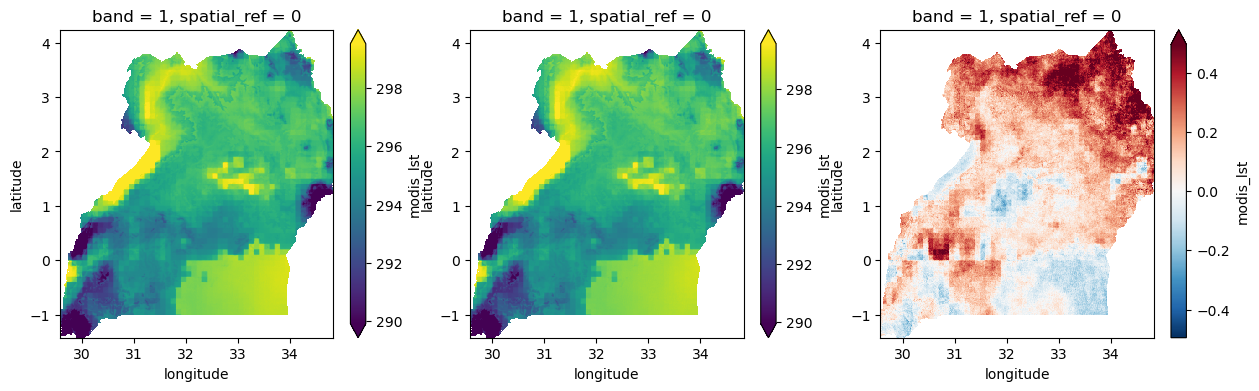

In [105]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))

t1 = merged.modis_lst.sel(time=slice("2012-12-31", "2013-12-31")).median("time"); t1.squeeze().plot.imshow(ax = ax[0], robust=True)
t2 = merged.modis_lst.sel(time=slice("2018-12-31", "2019-12-31")).median("time"); t2.squeeze().plot.imshow(ax = ax[1], robust=True)
modis_subset_ld = (t2 - t1); modis_subset_ld.squeeze().plot.imshow(ax = ax[2], robust=True)

In [106]:
merged["modis_lst_demeaned"] = (merged["modis_lst"] - merged["modis_lst"].mean("time"))
merged["modis_lst_demeaned"] = merged["modis_lst_demeaned"] - merged["modis_lst_demeaned"].mean(["latitude", "longitude"])

merged["viirs_radiance_demeaned"] = (merged["viirs_radiance"] - merged["viirs_radiance"].mean("time"))
merged["viirs_radiance_demeaned"] = merged["viirs_radiance_demeaned"] - merged["viirs_radiance_demeaned"].mean(["latitude", "longitude"])

In [107]:
merged["cell_id"] = (list(merged.sizes.keys()), np.broadcast_to(np.arange(merged.sizes["latitude"] * merged.sizes["longitude"]).reshape([merged.sizes["latitude"], merged.sizes["longitude"]]), merged.sizes.values()))

In [108]:
for dim in ["latitude", "longitude"]:
    merged.coords[dim] = merged.coords[dim].astype("int16")
merged.coords["time"] = pd.Series(merged.coords["time"]).dt.year

In [109]:
merged_df = merged[["modis_lst_demeaned", "viirs_radiance_demeaned", "cell_id", "subdivisions"]].to_dataframe().dropna().drop(columns=["spatial_ref"])

In [110]:
merged_df[["modis_lst_demeaned_l1", "viirs_radiance_demeaned_l1"]] = merged_df.groupby("cell_id")[["modis_lst_demeaned", "viirs_radiance_demeaned"]].shift()

In [ ]:
# merged_df.to_parquet("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data")

In [111]:
results = smf.ols('modis_lst_demeaned ~ viirs_radiance_demeaned', data=merged_df).\
    fit(cov_type='cluster', cov_kwds={'groups': merged_df['subdivisions']})
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     modis_lst_demeaned   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.499
Date:                Tue, 26 Aug 2025   Prob (F-statistic):            0.00295
Time:                        10:21:09   Log-Likelihood:                -68935.
No. Observations:            10105344   AIC:                         1.379e+05
Df Residuals:                10105342   BIC:                         1.379e+05
Df Model:                           1                                         
Covariance Type:              cluster                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2.908e-11   9.29e-12      3.129      0.002    1.09e-11    4.73e-11
viirs_radiance_demeaned     0.0305      0.010      3.082      0.002       0.011       0.050
==============================================================================
Omnibus:                  1737206.966   Durbin-Watson:                   0.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14146786.937
Skew:                           0.601   Prob(JB):                         0.00
Kurtosis:                       8.671   Cond. No.                         9.37
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
"""

In [ ]:
# avhrr = xr.open_zarr("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/glass/LST/AVHRR/0.05D/processed/stage_2/avhrr_timeseries_reprojected.zarr", consolidated = False, mask_and_scale=False)
# avhrr = avhrr.rio.write_crs(4326)
# avhrr_bangladesh = avhrr.rio.clip_box(*(88.0844222351, 20.670883287, 92.6727209818, 26.4465255803))["median"].compute()

In [ ]:
modis_bangladesh_2012 = modis_bangladesh.sel(time="2012-12-31").squeeze()
modis_bangladesh_2012_masked = modis_bangladesh_2012).where(round_coords(land_mask_bangladesh), round_coords(modis_bangladesh_2012))

In [24]:
viirs_bangladesh_2012 = viirs_bangladesh.sel(time="2012-12-31").squeeze()
viirs_bangladesh_2012_masked = round_coords(viirs_bangladesh_2012).where(round_coords(land_mask_bangladesh), round_coords(viirs_bangladesh_2012))

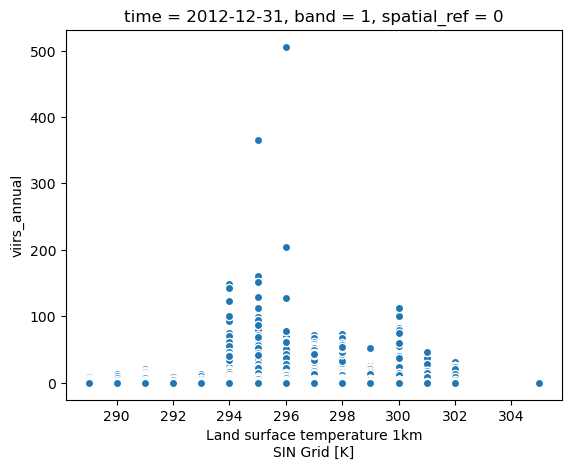

In [30]:
merged.plot.scatter(x="median", y="viirs_annual")

In [23]:
modis_bangladesh_2012_masked

<xarray.Dataset> Size: 104MB
Dimensions:      (latitude: 1387, longitude: 1102)
Coordinates:
    time         datetime64[ns] 8B 2012-12-31
    band         int64 8B 1
    spatial_ref  int64 8B 0
  * latitude     (latitude) float64 11kB 26.45 26.44 26.44 ... 20.68 20.68 20.67
  * longitude    (longitude) float64 9kB 88.08 88.09 88.09 ... 92.66 92.67 92.67
Data variables:
    min          (latitude, longitude) float64 12MB 287.0 287.0 ... 289.0 288.0
    median       (latitude, longitude) float64 12MB 298.0 298.0 ... 294.0 294.0
    max          (latitude, longitude) float64 12MB 306.0 306.0 ... 299.0 299.0
    std          (latitude, longitude) float64 12MB 5.0 5.0 5.0 ... 2.0 2.0 2.0
    rollmin3     (latitude, longitude) float64 12MB 287.0 287.0 ... 290.0 290.0
    mean         (latitude, longitude) float64 12MB 297.0 297.0 ... 294.0 294.0
    valid_count  (latitude, longitude) float32 6MB 365.0 365.0 ... 365.0 365.0
    rollmax3     (latitude, longitude) float64 12MB 306.0 306.0 ... 298.0 298.0
    gt30C        (latitude, longitude) float32 6MB 32.0 32.0 31.0 ... nan nan
    lt0C         (latitude, longitude) float32 6MB nan nan nan ... nan nan nan

In [15]:
modis_bangladesh_2000_masked

<xarray.Dataset> Size: 104MB
Dimensions:      (latitude: 1387, longitude: 1102)
Coordinates:
    time         datetime64[ns] 8B 2000-12-31
    band         int64 8B 1
    spatial_ref  int64 8B 0
  * latitude     (latitude) float64 11kB 26.45 26.44 26.44 ... 20.68 20.68 20.67
  * longitude    (longitude) float64 9kB 88.08 88.09 88.09 ... 92.66 92.67 92.67
Data variables:
    min          (latitude, longitude) float64 12MB 289.4 289.4 ... 288.5 288.5
    median       (latitude, longitude) float64 12MB 298.6 298.7 ... 294.4 294.4
    max          (latitude, longitude) float64 12MB 305.9 305.7 ... 300.0 300.0
    std          (latitude, longitude) float64 12MB 3.48 3.46 3.46 ... 1.99 1.99
    rollmin3     (latitude, longitude) float64 12MB 289.7 289.9 ... 290.1 290.1
    mean         (latitude, longitude) float64 12MB 297.8 297.8 ... 294.4 294.4
    valid_count  (latitude, longitude) float32 6MB 293.0 293.0 ... 292.0 292.0
    rollmax3     (latitude, longitude) float64 12MB 304.9 304.9 ... 298.8 298.8
    gt30C        (latitude, longitude) float32 6MB 9.0 9.0 9.0 ... nan nan nan
    lt0C         (latitude, longitude) float32 6MB nan nan nan ... nan nan nan

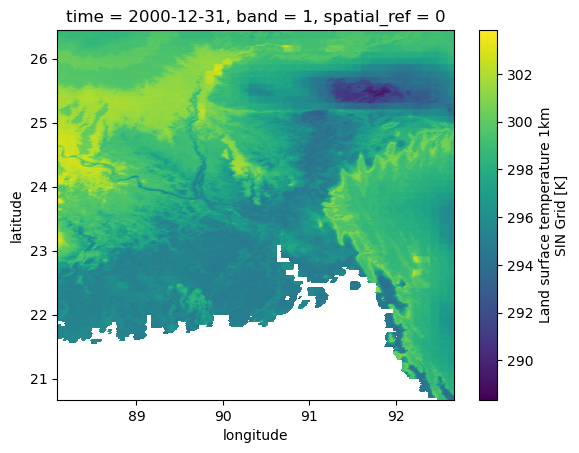

In [14]:
modis_bangladesh_2000_masked["median"].plot.imshow()

In [10]:
modis_bangladesh = modis_bangladesh.where(land_mask_bangladesh)
viirs_bangladesh = viirs_bangladesh.where(land_mask_bangladesh)

In [11]:
(modis_bangladesh["mean"].sel(time = slice("2010-12-31", "2019-12-31")).mean(dim = "time") - 
 modis_bangladesh["mean"].sel(time = slice("2000-12-31", "2009-12-31")).mean(dim = "time")).squeeze().plot.imshow()

TypeError: No numeric data to plot.

/scicore/home/meiera/schulz0022/miniforge-pypy3/envs/gnt/lib/python3.11/site-packages/xarray/core/computation.py:824: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


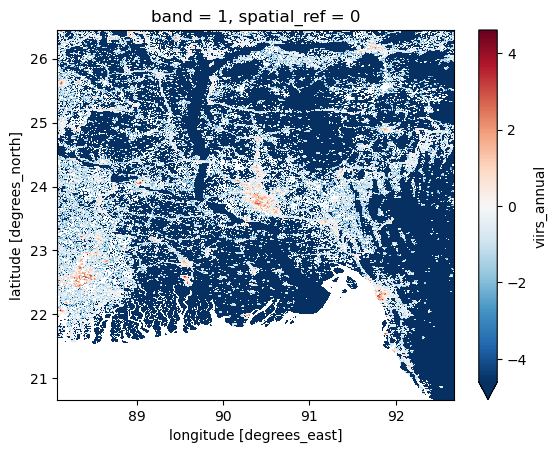

In [7]:
np.log(viirs_bangladesh["viirs_annual"].sel(time = "2020-12-31", band = 1) - viirs_bangladesh["viirs_annual"].sel(time = "2013-12-31", band = 1) + 0.01).plot.imshow(robust = True)

In [8]:
viirs_bangladesh

<xarray.Dataset> Size: 61MB
Dimensions:       (time: 10, band: 1, latitude: 1387, longitude: 1102)
Coordinates:
  * band          (band) int64 8B 1
  * latitude      (latitude) float64 11kB 26.45 26.44 26.44 ... 20.67 20.67
  * longitude     (longitude) float64 9kB 88.08 88.09 88.09 ... 92.67 92.67
  * time          (time) datetime64[ns] 80B 2012-12-31 2013-12-31 ... 2021-12-31
    spatial_ref   int64 8B 0
Data variables:
    viirs_annual  (time, band, latitude, longitude) float32 61MB 0.2089 ... 0.0

In [9]:
merged = xr.combine_by_coords(
    [
        modis_bangladesh["mean"].squeeze(),
        viirs_bangladesh["viirs_annual"].squeeze()
    ],
    combine_attrs="override"
)

In [10]:
merged_df = merged.to_dataframe().dropna()

In [14]:
merged_df

band  spatial_ref   mean  viirs_annual
latitude  longitude time                                              
26.445833 88.083335 2012-12-31     1            0  282.0      0.208900
                    2013-12-31     1            0  282.0      0.000000
                    2014-12-31     1            0  282.0      0.000000
                    2015-12-31     1            0  282.0      0.408697
                    2016-12-31     1            0  282.0      0.000000
...                              ...          ...    ...           ...
20.670833 92.670836 2016-12-31     1            0  293.0      0.000000
                    2017-12-31     1            0  293.0      0.000000
                    2018-12-31     1            0  293.0      0.000000
                    2019-12-31     1            0  294.0      0.000000
                    2020-12-31     1            0  293.0      0.000000

[11019564 rows x 4 columns]

<Axes: xlabel='mean', ylabel='viirs_annual'>

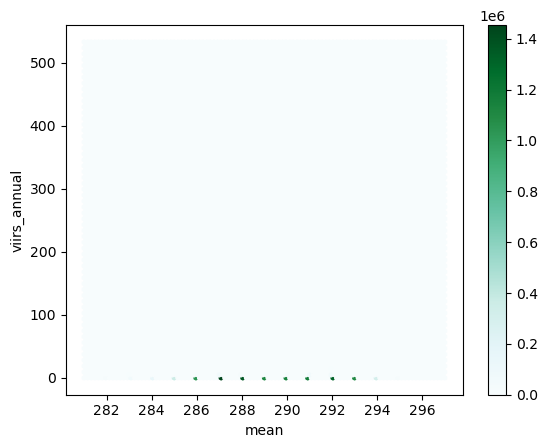

In [13]:
merged_df[["mean", "viirs_annual"]].plot(x = "mean", y = "viirs_annual", kind = "hexbin")

In [24]:
test = xr.open_zarr("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/glass/LST/MODIS/Daily/1KM/processed/stage_2/modis_timeseries_reprojected.zarr", consolidated=False)
test = test.rio.write_crs(4326)
test_bangladesh = test.sel(time="2002-12-31")["median"].rio.clip_box(*(88.0844222351, 20.670883287, 92.6727209818, 26.4465255803)).compute()

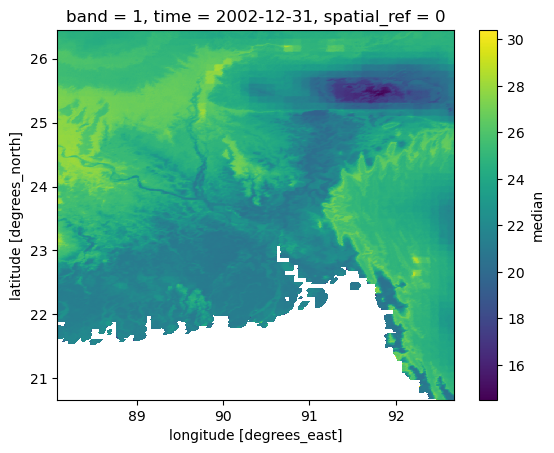

In [36]:
(test_bangladesh - 273.15).squeeze().ffill("latitude", 1).plot.imshow(robust=False)

In [ ]:
#test = test.odc.assign_crs(crs)
# bbox_crs = gpd.GeoSeries([shapely.box(88.0844222351, 20.670883287, 92.6727209818, 26.4465255803)], crs=4326).to_crs(crs).bounds.iloc[0]
# test.sel(x=slice(bbox_crs["minx"], bbox_crs["maxx"]), y=slice(bbox_crs["miny"], bbox_crs["maxy"]))["median"].compute().values
bounds = xr.open_zarr("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/glass/LST/MODIS/Daily/1KM/processed/stage_1/2002/h08v06.zarr").rio.bounds()

bounds = np.array(bounds).astype(int)
test.sel(x=slice(bbox_crs["minx"], bbox_crs["maxx"]), y=slice(bbox_crs["miny"], bbox_crs["maxy"]))["median"].compute().values
test["max"].sel(x=slice(bounds[0],bounds[2]), y=slice(bounds[1],bounds[3])).compute()#.odc.geobox
test["max"].isel(x=slice(i*1000,(i+1)*1000), y=slice(j*1000,(j+1)*1000)).compute().isnull().mean()